In [16]:
import sys
sys.path.insert(1, '/home/BCCRC.CA/ssubedi/projects/experiments/asapp/asapp/')

from util._io import read_config
from collections import namedtuple
from pathlib import Path
import pandas as pd
import numpy as np
import logging
from scannotation import ASAPP
from data._dataloader import DataSet
from util import _topics


import matplotlib.pylab as plt
import seaborn as sns
import colorcet as cc

from data import _sim 
from scipy import stats
from sklearn.metrics import mean_squared_error as mse

import joblib

experiment = '/projects/experiments/asapp/'
server = Path.home().as_posix()
experiment_home = server+experiment
experiment_config = read_config(experiment_home+'config.yaml')
args = namedtuple('Struct',experiment_config.keys())(*experiment_config.values())

dl = DataSet(data_ondisk=True)
dl.config = args
dl.initialize_path()
dl.initialize_data()
# dl.load_data()
print(dl.inpath)
print(dl.outpath)
# logging.basicConfig(filename=dl.outpath+'_model.log',
# 						format='%(asctime)s %(levelname)-8s %(message)s',
# 						level=logging.INFO,
# 						datefmt='%Y-%m-%d %H:%M:%S')

# asap = ASAPP(adata=dl,tree_min_leaf=5,tree_max_depth=1000, factorization='MVB',max_iter=10,n_pass=10)
# asap.factorize()
# asap.save_model()

/home/BCCRC.CA/ssubedi/projects/experiments/asapp/data/tabula_sapiens/tabula_sapiens
/home/BCCRC.CA/ssubedi/projects/experiments/asapp/result/tabula_sapiens/tabula_sapiens


In [17]:
asap = joblib.load(dl.outpath+'_model_vb.pkl')

In [24]:
asap.predicted_data.shape 

(20000, 18885)

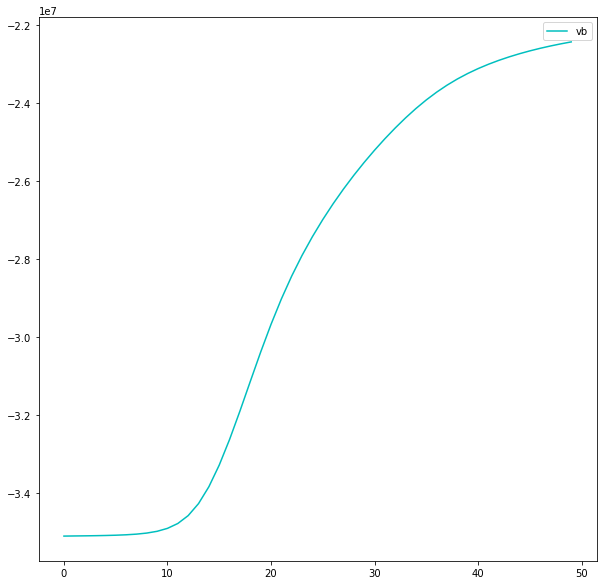

In [25]:
plt.plot(asap.llk,'c',label='vb')
plt.legend()

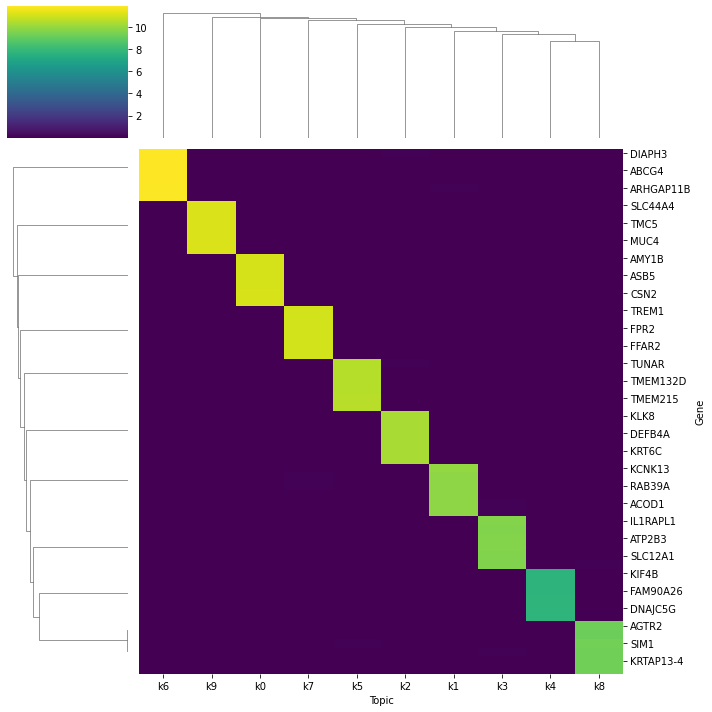

In [43]:
df_beta = pd.DataFrame(asap.Ebeta)
df_beta.columns = dl.cols
df_top = _topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=6)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

In [20]:
df_theta = pd.DataFrame(asap.predicted_params['theta_a']/asap.predicted_params['theta_b'])
df_theta.to_csv(dl.outpath+'_model_theta.csv.gz')

In [29]:
import umap

df_theta = pd.DataFrame(asap.predicted_params['theta_a']/asap.predicted_params['theta_b'])

# df_umap= pd.DataFrame()
# df_umap['cell'] = dl.rows
# df_umap['topic'] = [x for x in df_theta.iloc[:,1:].idxmax(axis=1)]

# umap_2d = umap.UMAP(n_components=2, init='random', random_state=0,min_dist=0.0,metric='cosine')
# proj_2d = umap_2d.fit(df_theta.iloc[:,1:])
# df_umap[['umap1','umap2']] = umap_2d.embedding_[:,[0,1]]
# df_umap


df_umap = pd.read_csv(dl.outpath+'_umap.csv')
df_umap = df_umap.rename(columns={'Unnamed: 0':'cell','V1':'umap1','V2':'umap2'})
df_umap['cell'] = asap.predicted_datarows
df_umap['topic'] = [x for x in df_theta.iloc[:,1:].idxmax(axis=1)]

df_umap

,cell,umap1,umap2,topic
0,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,-6.514637,1.792379,4
1,AAAGGATCAAATCAGA_TSP6_Liver_NA_10X_1_1,-7.856260,2.116576,4
2,AACCTGACACGCGTCA_TSP6_Liver_NA_10X_1_1,-7.998922,1.256360,4
3,AACGAAAGTGATGTAA_TSP6_Liver_NA_10X_1_1,-6.696126,2.114931,4
4,AACTTCTCAGTGCCTG_TSP6_Liver_NA_10X_1_1,-6.175061,3.090065,4
...,...,...,...,...
19995,AGGCATTTCTCAACCC_TSP4_Uterus_Endometrium_10X_1_1,2.483539,1.207923,3
19996,AGGCCACTCACACCCT_TSP4_Uterus_Endometrium_10X_1_1,2.562724,1.339750,5
19997,AGGCCACTCCTAAACG_TSP4_Uterus_Endometrium_10X_1_1,2.081388,1.729814,3
19998,AGGCTGCAGGGAGAAT_TSP4_Uterus_Endometrium_10X_1_1,2.618392,1.410750,5


In [30]:

df_umap['cell_type'] = [x.split('_')[2] for x in df_umap['cell']]
df_umap

,cell,umap1,umap2,topic,cell_type
0,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,-6.514637,1.792379,4,Liver
1,AAAGGATCAAATCAGA_TSP6_Liver_NA_10X_1_1,-7.856260,2.116576,4,Liver
2,AACCTGACACGCGTCA_TSP6_Liver_NA_10X_1_1,-7.998922,1.256360,4,Liver
3,AACGAAAGTGATGTAA_TSP6_Liver_NA_10X_1_1,-6.696126,2.114931,4,Liver
4,AACTTCTCAGTGCCTG_TSP6_Liver_NA_10X_1_1,-6.175061,3.090065,4,Liver
...,...,...,...,...,...
19995,AGGCATTTCTCAACCC_TSP4_Uterus_Endometrium_10X_1_1,2.483539,1.207923,3,Uterus
19996,AGGCCACTCACACCCT_TSP4_Uterus_Endometrium_10X_1_1,2.562724,1.339750,5,Uterus
19997,AGGCCACTCCTAAACG_TSP4_Uterus_Endometrium_10X_1_1,2.081388,1.729814,3,Uterus
19998,AGGCTGCAGGGAGAAT_TSP4_Uterus_Endometrium_10X_1_1,2.618392,1.410750,5,Uterus


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'ASAP')

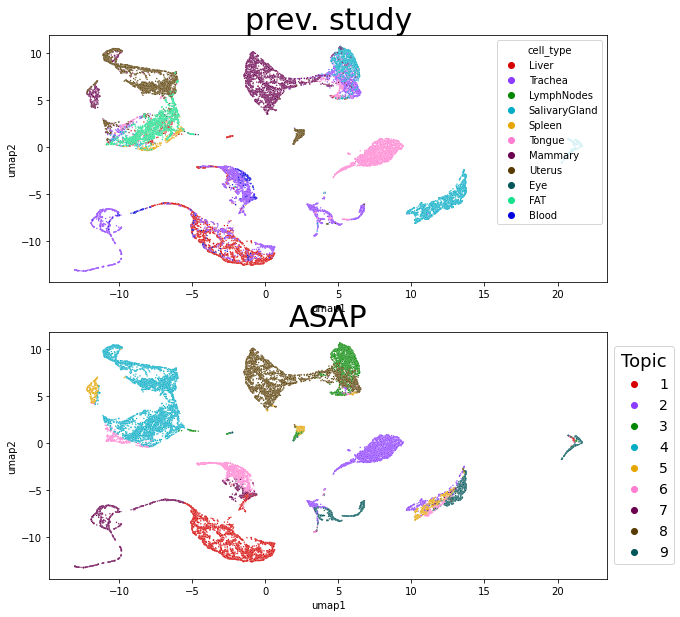

In [34]:
plt.rcParams["figure.figsize"] = (10,10)
figure,axis = plt.subplots(2,1)


cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['cell_type'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='cell_type',s=2,palette=cp,legend=True,ax=axis[0])
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("prev. study",fontsize=30)


cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['topic'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='topic',s=2,palette=cp,legend=True)
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("ASAP",fontsize=30)

Text(224.82954545454544, 0.5, 'cell_type')

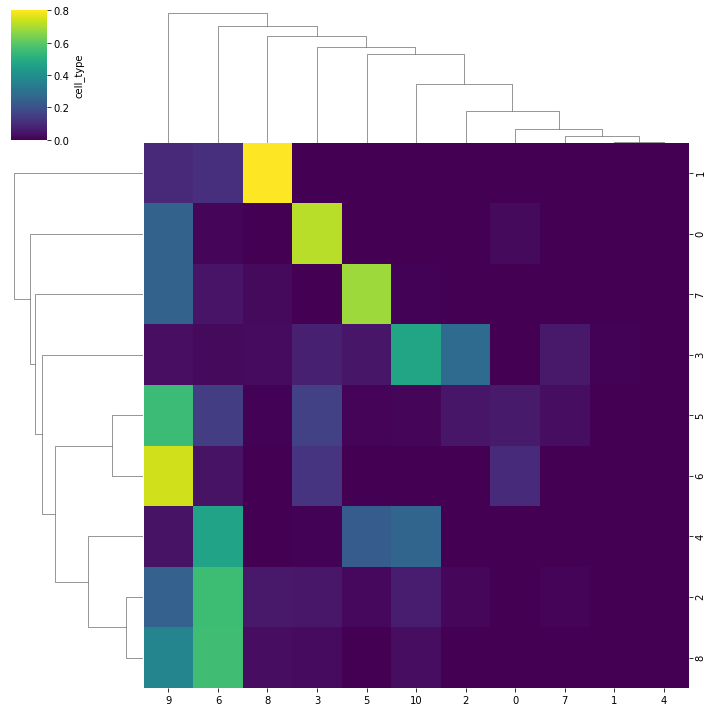

In [35]:
from sklearn.metrics.cluster import contingency_matrix
df_rmatch = pd.DataFrame(contingency_matrix(df_umap.topic,df_umap.cell_type))
# df_rmatch = pd.DataFrame(contingency_matrix(df_umap.topic_sc_ct,df_umap.topic_blk_ct))
df_rmatch = df_rmatch.div(df_rmatch.sum(axis=1), axis=0)
sns.clustermap(df_rmatch,cmap='viridis')
plt.xlabel('sc')
plt.ylabel('cell_type')


In [36]:
df_grp = df_umap.groupby(['topic','cell_type'])['cell_type'].size().rename('count').reset_index()
celltype_sum = dict(df_grp.groupby('topic')['count'].sum())
df_grp['ncount'] = [x/celltype_sum[y] for x,y in zip(df_grp['count'],df_grp['topic'])]
df_grp['topic'] =  df_grp['topic'].astype(int)
df_grp.to_csv(dl.outpath+'_r1_topic_ct_dist.csv.gz',index=False, compression='gzip')

In [40]:

def marker_genes(fn,mtx,rows,cols,df_umap):

	from anndata import AnnData
	import scanpy as sc
	import numpy as np

	adata = AnnData(mtx)
	sc.pp.normalize_total(adata, target_sum=1e4)
	sc.pp.log1p(adata)
	dfn = adata.to_df()
	dfn.columns = cols
	dfn['cell'] = rows

	dfn = pd.merge(dfn,df_umap[['cell','umap1','umap2']],on='cell',how='left')

	return dfn
dfn = marker_genes(dl.outpath,asap.predicted_data,asap.predicted_datarows,dl.cols,df_umap)

In [41]:
def plot_marker_genes(fn,dfn,marker_genes):

	import matplotlib.pylab as plt
	plt.rcParams['figure.figsize'] = [10, 5]
	plt.rcParams['figure.autolayout'] = True
	import seaborn as sns

	fig, ax = plt.subplots(2,3) 
	ax = ax.ravel()

	for i,g in enumerate(marker_genes):
		if g in dfn.columns:
			print(g)
			val = np.array([x if x<3 else 3.0 for x in dfn[g]])
			sns.scatterplot(data=dfn, x='umap1', y='umap2', hue=val,s=.1,palette="viridis",ax=ax[i],legend=False)

			norm = plt.Normalize(val.min(), val.max())
			sm = plt.cm.ScalarMappable(cmap="viridis",norm=norm)
			sm.set_array([])

			# cax = fig.add_axes([ax[i].get_position().x1, ax[i].get_position().y0, 0.01, ax[i].get_position().height])
			fig.colorbar(sm,ax=ax[i])
			ax[i].axis('off')

			ax[i].set_title(g)
	# fig.savefig(fn+'_umap_marker_genes.png',dpi=600);plt.close()

KCNK13
CCL24
CD86
SDS
RAB39A
ACOD1


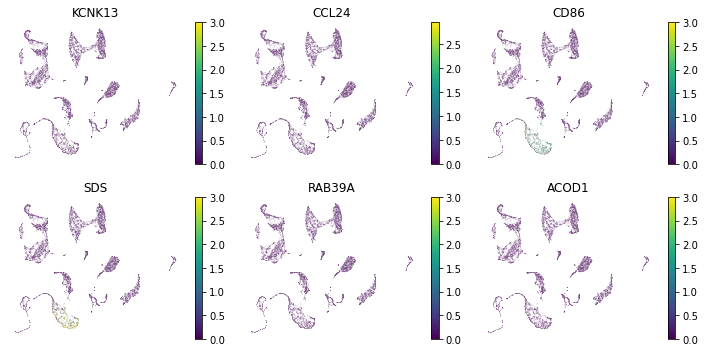

In [46]:

## liver
marker_genes = list(df_top.T.sort_values('k1',ascending=False).index.values[:6])
plot_marker_genes(dl.outpath,dfn,marker_genes)

LY6D
KLK8
DEFB4A
CALML3
KRT6C
SPRR1A


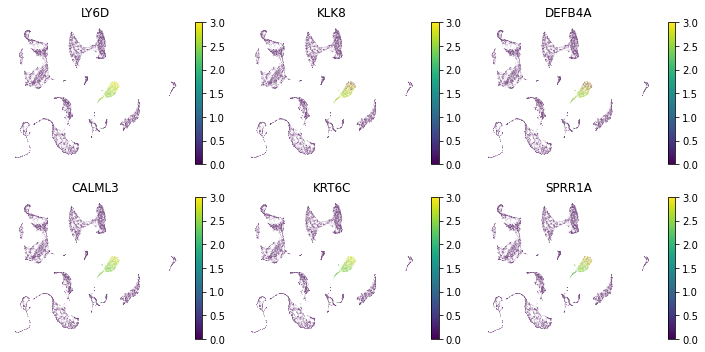

In [48]:

## tongue
marker_genes = list(df_top.T.sort_values('k2',ascending=False).index.values[:6])
plot_marker_genes(dl.outpath,dfn,marker_genes)